# Practica 2- Reducción de Dimensionalidad

## Carga de Información

Se cargará la información que será usada para esta practica

In [56]:
##Importamos algunas librerias que nos servirán en el desarrollo del problema
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

Cargamos la información que nos ayudará con el modelo

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [17]:
##Verificamos que haya cargado la información, y que tenga la forma requerida
print('Rango Tensor:',train_images.ndim)
print('Forma Tensor:',train_images.shape)
#Solo mostramos las primeras 10 columnas de Ancho y Largo
print('Vemos Primer Registro:',train_images[0,:10,:10])

Rango Tensor: 3
Forma Tensor: (60000, 28, 28)
Vemos Primer Registro: [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


Dejamos los tensores solo con dimensiones para poder trabajarlo para nuestro modelo.

In [20]:
features=train_images.shape[1]*train_images.shape[2]
train_images= np.array(train_images).reshape(-1,features)
train_labels= np.array(train_labels).reshape(-1,1)
print('Forma Tensor de Imagenes:',train_images.shape)
print('Forma Tensor Labels:',train_labels.shape)

Forma Tensor de Imagenes: (60000, 784)
Forma Tensor Labels: (60000, 1)


*Nota:* _El dataset de Test no se usará para el ejercicio._

## Parte 1 -  PCA Implementation

Se creará una clase que me permita implementar PCA para cualquier dataset.

In [104]:
class PCA:
    '''Implementación del Algoritmo Reducción Dimensionalidad PCA'''
    
    def __init__(self, n_components=None):
        '''Constructor de la clase PCA'''
        ##Por el Momento solamente se necesita el número de componentes del Modelo
        self.n_components = n_components
        
    def fit_transform(self, data):
        '''Metodo para la Transformación del Dataset al número de Componentes especificados en el constructor'''
        
        #Paso 1 - Normalizamos los datos Recibidos
        #Se setea el scaler
        self.scaler = StandardScaler()
        self.scaler.fit(data)
        #Se deja disponible el Scaler por si fuera necesario

        #Se transforma los datos
        Data_Norm=scaler.transform(data)
        
        #Paso 2 - Calculamos la Matriz de Covarianza de los datos
        df = pd.DataFrame(Data_Norm)
        cov_matrix=df.cov().values
        
        #Paso 3 - Calculo de Vectores Propios (eigenvectors) y Valores Propios (eigenvalues)
        #Usando el Metodo SVD (Singular value decomposition)
        eigenvalues, eigenvectors = linalg.eig(cov_matrix)
        
        #Paso 4 - Obtenemos los valores PCA
        PCA= np.matmul(Data_Norm,eigenvectors[:,:self.n_components])
        
        #Preparamos algunos datos que nos servirán para ver la varianza de los componentes
        self.explained_variance_=eigenvalues[:self.n_components]
        self.explained_variance_ratio_=(eigenvalues/np.sum(eigenvalues))[:self.n_components]
        self.explained_variance_ratio_cumsum=(np.cumsum(self.explained_variance_ratio_))[:self.n_components]
        
        #Retornamos los valores de PCA
        return PCA

### Prueba

Se prueba la clase desarrollada sobre nuestro dataset - Se reduce a 2 dimensiones

In [109]:
PCAmodel = PCA(n_components=2)
Data_components= PCAmodel.fit_transform(train_images)


print('Nueva Forma Data_Components:',Data_components.shape)
print('Vemos Primer Registro:',Data_components[0])
print("Varianza de cada componente:",PCAmodel.explained_variance_)
print("Ratio Varianza de cada componente: ",PCAmodel.explained_variance_ratio_)
print("Acumulado Ratio: ",PCAmodel.explained_variance_ratio_cumsum)

Nueva Forma Data_Components: (60000, 2)
Vemos Primer Registro: [ -0.80117477 -20.86674867]
Varianza de cada componente: [173.13789644 113.01260323]
Ratio Varianza de cada componente:  [0.22083547 0.14414633]
Acumulado Ratio:  [0.22083547 0.3649818 ]


**Varianza Preservada:** Con dos componentes se conserva el 36% de la varianza del modelo.

## Visualización 

Vemos visualmente como quedaron nuestros componentes en base a los labes de nuestra data

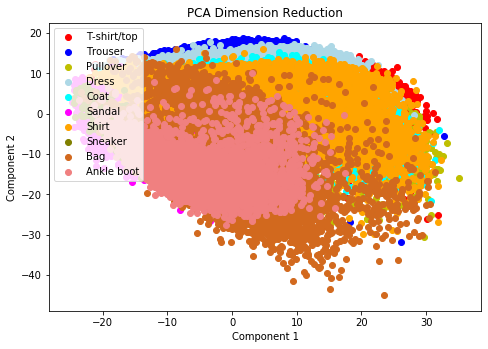

In [150]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Data_components[np.array(train_labels==0).reshape(-1),0], Data_components[np.array(train_labels==0).reshape(-1),1], color='r', label="T-shirt/top")
ax.scatter(Data_components[np.array(train_labels==1).reshape(-1),0], Data_components[np.array(train_labels==1).reshape(-1),1], color='b', label="Trouser")
ax.scatter(Data_components[np.array(train_labels==2).reshape(-1),0], Data_components[np.array(train_labels==2).reshape(-1),1], color='y', label="Pullover")
ax.scatter(Data_components[np.array(train_labels==3).reshape(-1),0], Data_components[np.array(train_labels==3).reshape(-1),1], color='lightblue', label="Dress")
ax.scatter(Data_components[np.array(train_labels==4).reshape(-1),0], Data_components[np.array(train_labels==4).reshape(-1),1], color='cyan', label="Coat")
ax.scatter(Data_components[np.array(train_labels==5).reshape(-1),0], Data_components[np.array(train_labels==5).reshape(-1),1], color='fuchsia', label="Sandal")
ax.scatter(Data_components[np.array(train_labels==6).reshape(-1),0], Data_components[np.array(train_labels==6).reshape(-1),1], color='orange', label="Shirt")
ax.scatter(Data_components[np.array(train_labels==7).reshape(-1),0], Data_components[np.array(train_labels==7).reshape(-1),1], color='olive', label="Sneaker")
ax.scatter(Data_components[np.array(train_labels==8).reshape(-1),0], Data_components[np.array(train_labels==8).reshape(-1),1], color='chocolate', label="Bag")
ax.scatter(Data_components[np.array(train_labels==9).reshape(-1),0], Data_components[np.array(train_labels==9).reshape(-1),1], color='lightcoral', label="Ankle boot")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('PCA Dimension Reduction')
plt.legend(loc="upper left")
plt.show()

## Parte 2 -  T-SNE

Usando scikit-Learn usaremos el Modelo T-sne para la reducción de la dimensionalidad para el Dataset con el que trabajamos la parte anterior.

In [ ]:
from sklearn.manifold import TSNE

modelTSNE= TSNE(n_components=2)
X_components=modelTSNE.fit_transform(train_images)

print('Nueva Forma Data_Components:',Data_components.shape)
print('Vemos Primer Registro:',Data_components[0])